<div style="text-align: center; font-size: 16px;">
    <strong>Course:</strong> Machine Learning Operations |
    <strong>Lecturer:</strong> Prof. Dr. Klotz |
    <strong>Date:</strong> 17.05.2025 |
    <strong>Name:</strong> Sofie Pischl
</div>

# <center>Topic Modeling </center>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from pathlib import Path

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SofiePischl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
BASE_DIR = Path().resolve().parent
RAW_DIR = (BASE_DIR / "./data/processed").resolve()

# Datei laden
df = pd.read_csv(RAW_DIR / "social_media_data.csv")

display(df.head())
df.info()

,source,id,title,text,username,likes,comments,shares,plays,timestamp,published_at,url,title_language,title_clean,text_language,text_clean,title_char_count,title_word_count,title_uppercase_count,title_exclamation_count,title_question_count,title_emoji_count,title_mention_count,title_hashtag_count,title_avg_word_length,title_sentiment,title_sentiment_score,text_char_count,text_word_count,text_uppercase_count,text_exclamation_count,text_question_count,text_emoji_count,text_mention_count,text_hashtag_count,text_avg_word_length,text_sentiment,text_sentiment_score,engagement_rate,hour,weekday,year,month,day_period,is_weekend
0,youtube,-F33ACcPbhU,Monster Hunter Wilds – Festival of Accord: Blo...,Bask in the springtime aura and enjoy cherry b...,Monster Hunter,0.001926,0.001461,NaN,0.002288,2025-04-22 22:06:12.302112,2025-04-22 01:00:25+00:00,https://www.youtube.com/watch?v=-F33ACcPbhU,en,monster hunter wild festival accord blossomdan...,en,bask springtime aura enjoy cherry blossom seas...,70,9,0,0,0,0,0,0,6.888889,neutral,0.1,835,124,0,0,0,0,0,0,5.741935,positive,0.133117,0.150794,1,Tuesday,2025,4,night,False
1,youtube,-H8tvnWaYs4,Chelsea 3-1 Liverpool | HIGHLIGHTS | Premier L...,PL Matchday 35 - Highlights of Chelsea's 3-1 P...,Chelsea Football Club,0.006466,0.002073,NaN,0.021392,2025-05-07T12:30:17.866760,2025-05-04 21:00:09+00:00,https://www.youtube.com/watch?v=-H8tvnWaYs4,en,chelsea 3 1 liverpool highlight premier league...,en,pl matchday 35 highlight chelsea 's 3 1 premie...,54,9,0,0,0,0,0,0,5.111111,neutral,0.0,1551,237,0,0,0,3,0,0,5.548523,positive,0.218157,0.055552,21,Sunday,2025,5,night,True
2,youtube,-H8tvnWaYs4,Chelsea 3-1 Liverpool | HIGHLIGHTS | Premier L...,PL Matchday 35 - Highlights of Chelsea's 3-1 P...,Chelsea Football Club,0.006302,0.002047,NaN,0.020078,2025-05-06T13:32:11.312387,2025-05-04 21:00:09+00:00,https://www.youtube.com/watch?v=-H8tvnWaYs4,en,chelsea 3 1 liverpool highlight premier league...,en,pl matchday 35 highlight chelsea 's 3 1 premie...,54,9,0,0,0,0,0,0,5.111111,neutral,0.0,1551,237,0,0,0,3,0,0,5.548523,positive,0.218157,0.057737,21,Sunday,2025,5,night,True
3,youtube,-H8tvnWaYs4,Chelsea 3-1 Liverpool | HIGHLIGHTS | Premier L...,PL Matchday 35 - Highlights of Chelsea's 3-1 P...,Chelsea Football Club,0.005880,0.001841,NaN,0.016887,2025-05-05T18:10:08.695398,2025-05-04 21:00:09+00:00,https://www.youtube.com/watch?v=-H8tvnWaYs4,en,chelsea 3 1 liverpool highlight premier league...,en,pl matchday 35 highlight chelsea 's 3 1 premie...,54,9,0,0,0,0,0,0,5.111111,neutral,0.0,1551,237,0,0,0,3,0,0,5.548523,positive,0.218157,0.064062,21,Sunday,2025,5,night,True
4,youtube,-JFW5V4U6bo,Picks 1-10: Jaguars TRADE UP For Travis Hunter...,"Watch live local and primetime games, NFL RedZ...",NFL,0.001668,0.002625,NaN,0.005469,2025-04-25 14:45:45.902741,2025-04-25 01:55:00+00:00,https://www.youtube.com/watch?v=-JFW5V4U6bo,en,pick 1 10 jaguar trade travis hunter 2025 nfl ...,en,watch live local primetime game nfl redzone nf...,51,10,0,0,0,0,0,0,4.200000,neutral,0.0,214,35,0,0,0,0,0,0,5.142857,neutral,-0.087879,0.060363,1,Friday,2025,4,night,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   1007 non-null   object 
 1   id                       1007 non-null   object 
 2   title                    1007 non-null   object 
 3   text                     1007 non-null   object 
 4   username                 372 non-null    object 
 5   likes                    1007 non-null   float64
 6   comments                 1007 non-null   float64
 7   shares                   0 non-null      float64
 8   plays                    1007 non-null   float64
 9   timestamp                1007 non-null   object 
 10  published_at             1007 non-null   object 
 11  url                      1007 non-null   object 
 12  title_language           1007 non-null   object 
 13  title_clean              1007 non-null   object 
 14  text_language           

In [8]:
# Anzahl der Posts pro Plattform
post_counts = df["source"].value_counts().reset_index()
post_counts.columns = ["source", "num_posts"]

# Anzeige
print(post_counts)

    source  num_posts
0   reddit        635
1  youtube        372


C:\Users\SofiePischl\AppData\Local\Temp\ipykernel_34800\440058293.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SofiePischl\Documents\01_HdM\10_ML_OPS\TrendAnalyseSocialMedia\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


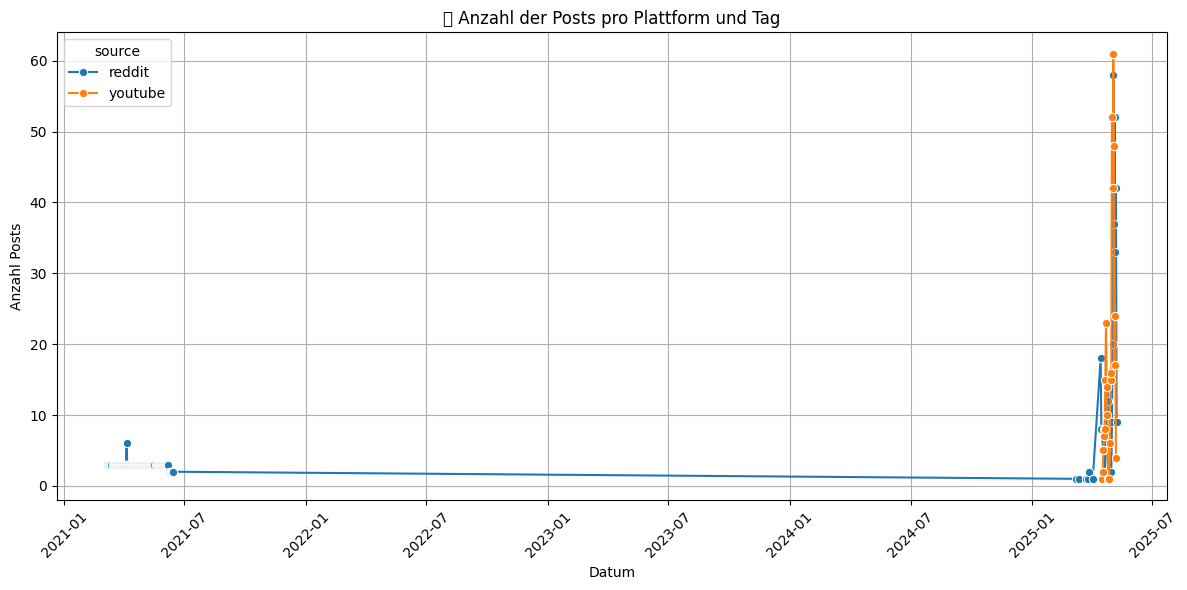

In [7]:
# Fehlerhafte Werte ignorieren, Pandas erkennt Format automatisch
df["published_at"] = pd.to_datetime(df["published_at"], errors="coerce", utc=True)

# Nur Datum (ohne Uhrzeit)
df["date"] = df["published_at"].dt.date
# Anzahl der Posts pro Plattform pro Tag
posts_per_day = df.groupby(["source", "date"]).size().reset_index(name="post_count")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=posts_per_day, x="date", y="post_count", hue="source", marker="o")
plt.title("📊 Anzahl der Posts pro Plattform und Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Posts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



# Texte zusammenführen

In [11]:
# Kombinieren von Titel und Text (beide bereinigt)
texts = (df["title_clean"].fillna("") + " " + df["text_clean"].fillna("")).astype(str)

# Stopwörter entfernen und tokenisieren

In [ ]:
# Englische Stopwörter laden
stop_words = stopwords.words('english')

# Text-Vektorisierung (Bag of Words)
vectorizer = CountVectorizer(
    stop_words=stop_words,
    max_df=0.95,
    min_df=2
)

X = vectorizer.fit_transform(texts)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 85383 stored elements and shape (1007, 9397)>

# Train LDA Model

In [22]:
lda_model = LatentDirichletAllocation(
    n_components=9,         # Anzahl der Themen (anpassbar)
    max_iter=3,
    learning_method='online',
    random_state=42
)

lda_model.fit(X)


LatentDirichletAllocation(learning_method='online', max_iter=3, n_components=9,
                          random_state=42)

# Show topics

In [23]:
# Funktion zum Anzeigen der Themen mit Top-Wörtern
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"🟢 Thema {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


🟢 Thema 1:
trump game highlight collection tariff default yo follow 2025 maga

🟢 Thema 2:
say get like make go tell time want one year

🟢 Thema 3:
00 10 13 11 12 14 pf 15 16 17

🟢 Thema 4:
instagram video tiktok werbung link burger twitter joey julian folge

🟢 Thema 5:
subreddits community subscriber year trend subreddit interest 2021 discussion please

🟢 Thema 6:
league liam club cup ketchup chelsea 2024 measles race highlight

🟢 Thema 7:
2025 11 video instagram youtube link 00 10 12 music

🟢 Thema 8:
instagram youtube video live dazn box news tiktok kanal twitter

🟢 Thema 9:
dazn battle league highlight v8 champion sowie clan amg besten



In [25]:
# Eigene Stopwords definieren
custom_stopwords = {
    'youtube', 'instagram', 'video', 'link', 'highlight', 'tiktok', 'channel',
    'twitter', 'dazn', 'follow', 'live', '2025', '00', '10', '11', '12', '13', '14', '15', '16', '17'
}

# Gesamtmenge an Stopwords (NLTK + custom)
all_stopwords = set(stopwords.words('english')).union(custom_stopwords)

# Neue Vektorisierung mit erweiterten Stopwords
vectorizer = CountVectorizer(
    stop_words=list(all_stopwords), 
    max_df=0.95,
    min_df=2
)

X = vectorizer.fit_transform(texts)

lda_model = LatentDirichletAllocation(
    n_components=9,         # Anzahl der Themen (anpassbar)
    max_iter=3,
    learning_method='online',
    random_state=42
)

lda_model.fit(X)

# Funktion zum Anzeigen der Themen mit Top-Wörtern
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"🟢 Thema {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


🟢 Thema 1:
v8 turbo amg bi sowie katseye gnarly reaction gamerbrother mercedes

🟢 Thema 2:
pf game 21 20 19 23 29 pt team 18

🟢 Thema 3:
battle clan player affiliate burger werbung joey facebook play build

🟢 Thema 4:
trump tariff source funk default trailer coach america city 2024

🟢 Thema 5:
league oblivion 2024 club sport al et cup scroll chelsea

🟢 Thema 6:
mehr kanal song werbung music beim yo de like spaß

🟢 Thema 7:
subreddits community year subscriber trend get say subreddit interest work

🟢 Thema 8:
liam show say like sign know make get right collection

🟢 Thema 9:
grade library arena music semester game netflix _______ fail professor



In [ ]:
from bertopic import BERTopic

# Texte vorbereiten
texts_list = texts.tolist()

# Modell trainieren
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(texts_list)

# Top-Themen anzeigen
topic_model.get_topic_info()

c:\Users\SofiePischl\Documents\01_HdM\10_ML_OPS\TrendAnalyse Social Media\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-09 09:08:22,424 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
2025-05-09 09:08:39,634 - BERTopic - Embedding - Completed ✓
2025-05-09 09:08:39,636 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-09 09:08:47,703 - BERTopic - Dimensionality - Completed ✓
2025-05-09 09:08:47,705 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-09 09:08:47,809 - BERTopic - Cluster - Completed ✓
2025-05-09 09:08:47,813 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-09 09:08:47,904 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,81,-1_instagram_subreddits_peloton_community,"[instagram, subreddits, peloton, community, ye...",[trend subreddits 2021 04 05 r freeebooks r th...
1,0,284,0_say_not_get_like,"[say, not, get, like, nt, go, tell, make, want...",[update aitah consider call wed fiancée refuse...
2,1,68,1_video_instagram_al_et,"[video, instagram, al, et, werbung, link, mehr...",[100 stunden blind date box abonnieren verpass...
3,2,44,2_00_pf_13_14,"[00, pf, 13, 14, 11, 15, 16, 12, 10, pt]",[post game thread indiana pacer head back home...
4,3,42,3_community_year_subscriber_subreddits,"[community, year, subscriber, subreddits, tren...",[trend subreddits 2021 06 13 r place r thanosd...
5,4,39,4_subreddits_community_subscriber_trend,"[subreddits, community, subscriber, trend, yea...",[trend subreddits 2021 04 03 r old_recipes r z...
6,5,36,5_subreddits_community_subscriber_year,"[subreddits, community, subscriber, year, tren...",[trend subreddits 2021 04 30 r oldphotosinreal...
7,6,34,6_2025_music_11_arena,"[2025, music, 11, arena, yo, production, kontr...",[kontra k geboren leben feat ness official vid...
8,7,30,7_arda_music_lickd_license,"[arda, music, lickd, license, stock, instagram...",[geht los run full length japan cyborg season ...
9,8,25,8_subreddits_community_subscriber_year,"[subreddits, community, subscriber, year, tren...",[trend subreddits 2021 04 14 r shittygifrecipe...


# Save Topics

In [31]:
# Topic-Zuweisungen (Wahrscheinlichkeitsverteilung pro Dokument)
topic_distribution = lda_model.transform(X)

# Das wahrscheinlichste Thema je Text
dominant_topics = topic_distribution.argmax(axis=1)

# Dem Original-DataFrame zuweisen
df_topics = df.loc[texts.index].copy()
df_topics["dominant_topic"] = dominant_topics


# CSV-Datei mit Topics
df_topics.to_csv(RAW_DIR / "social_media_with_topics.csv", index=False)

# Sentiment analyse

In [32]:
# Wir nutzen df_topics, das die Spalte "dominant_topic" enthält
topic_sentiment = df_topics.groupby("dominant_topic")["text_sentiment_score"].agg(["mean", "count", "std"]).reset_index()
topic_sentiment.columns = ["topic", "avg_sentiment", "num_texts", "std_dev"]

# Ergebnisse anzeigen
topic_sentiment


,topic,avg_sentiment,num_texts,std_dev
0,0,0.081552,28,0.146570
1,1,0.051858,84,0.167388
2,2,0.175078,51,0.215821
3,3,0.061179,45,0.125046
4,4,0.106540,39,0.140783
5,5,0.074336,91,0.202167
6,6,0.097546,596,0.139928
7,7,0.075191,41,0.132909
8,8,0.111115,32,0.140300


In [37]:
# Wenn du es noch nicht hast
df_topics = df.copy()
df_topics["topic"] = topics  # topics stammt aus topic_model.transform(texts_list)

# Durchschnittliches Sentiment und Anzahl Dokumente pro Thema
sentiment_per_topic = df_topics.groupby("topic")["text_sentiment_score"].agg(["mean", "count"]).reset_index()
sentiment_per_topic.columns = ["topic", "avg_sentiment", "num_docs"]

# Top 5 Themen mit höchstem durchschnittlichem Sentiment (ohne Outlier -1)
top_positive_topics = sentiment_per_topic[sentiment_per_topic["topic"] != -1].sort_values("avg_sentiment", ascending=False).head(5)
top_positive_topics

for topic_id in top_positive_topics["topic"]:
    print(f"🟢 Thema {topic_id}")
    print("Top-Wörter:", ", ".join([word for word, _ in topic_model.get_topic(topic_id)[:10]]))
    print()

🟢 Thema 14
Top-Wörter: subreddits, community, subscriber, trend, year, discussion, 2021, nurburgring, interest, please

🟢 Thema 22
Top-Wörter: julian, trump, ehrenpflaume, bogner, pfeil, mal, zeit, schnitt, lasst, video

🟢 Thema 6
Top-Wörter: 2025, music, 11, arena, yo, production, kontra, katseye, kim, gnarly

🟢 Thema 25
Top-Wörter: subreddits, community, subreddit, subscriber, year, trend, washingtondc, shoegaze, curseofstrahd, 12

🟢 Thema 15
Top-Wörter: subreddits, subreddit, community, subscriber, year, trend, iota, spacex, 2021, interest

